In [1]:
!pip install "numpy<1.20" matplotlib scipy pillow opencv-python-headless scikit-image


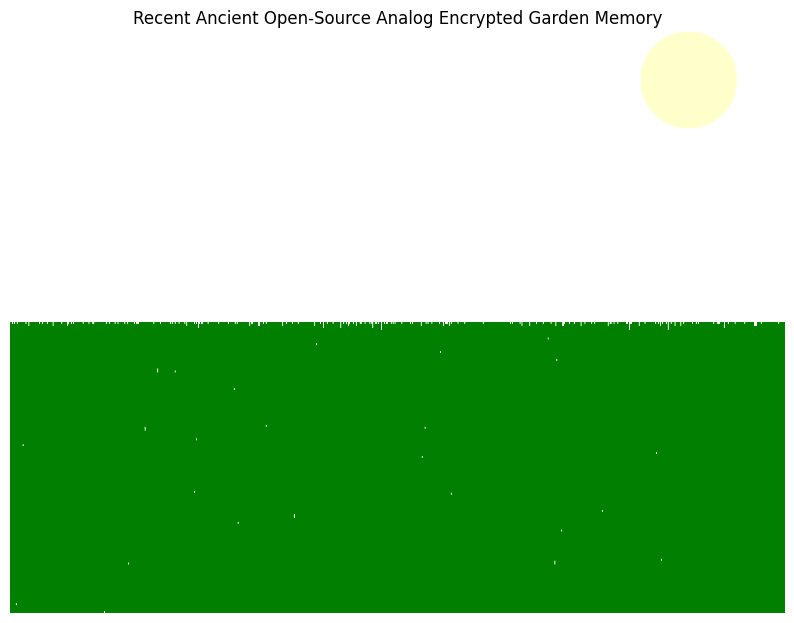

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Set the size of the output image
width, height = 800, 600

# Initialize a blank canvas
canvas = np.ones((height, width, 3))

# Define colors
grass_color = np.array([0.0, 0.5, 0.0])
sun_color = np.array([1.0, 1.0, 0.8])

# Draw grass at the bottom half of the canvas
grass_height = height // 2
for i in range(width):
    for j in range(height - grass_height, height, 2):  # starting from the middle to the bottom
        if np.random.rand() > 0.2:  # sparsity of the grass
            canvas[j:min(j + 10, height), i] = grass_color  # make the blade of grass

# Draw a sun in the top right corner
sun_radius = 50
for i in range(width):
    for j in range(grass_height):
        if (i - (width - sun_radius * 2))**2 + (j - sun_radius)**2 < sun_radius**2:
            canvas[j, i] = sun_color

# Plot the image
plt.figure(figsize=(10, 8))
plt.imshow(canvas)
plt.axis('off')
plt.title('Recent Ancient Open-Source Analog Encrypted Garden Memory')
plt.show()


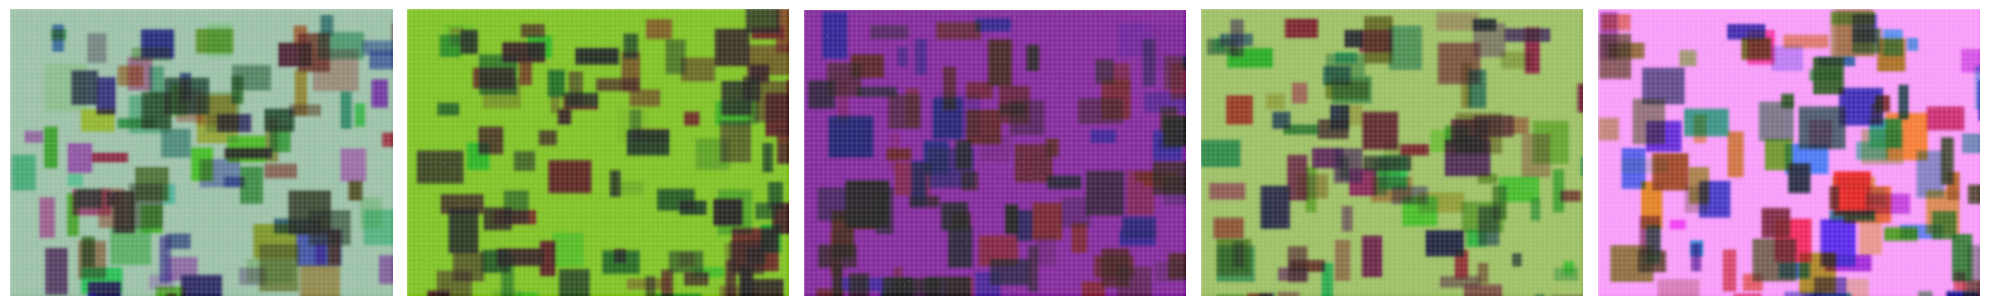

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

# Set the size of the output image
width, height = 800, 600
num_variations = 5

def create_variation(seed):
    np.random.seed(seed)

    # Initialize a blank canvas
    canvas = np.zeros((height, width, 3))

    # Create a random color background
    for i in range(3):  # RGB channels
        canvas[:, :, i] = np.random.rand()

    # Add geometric patterns like Alfred Jensen
    for _ in range(100):  # number of shapes
        x, y = np.random.randint(0, width), np.random.randint(0, height)
        dx, dy = np.random.randint(20, 100), np.random.randint(20, 100)
        color = np.random.rand(3)
        canvas[y:y+dy, x:x+dx, :] *= color

    # Add grid or graph like patterns
    for i in range(0, width, 10):
        canvas[:, i, :] = 1  # vertical lines
    for j in range(0, height, 10):
        canvas[j, :, :] = 1  # horizontal lines

    # Overlay with Gaussian blur to simulate "encrypted" effect
    for i in range(3):  # Apply separately for each RGB channel
        canvas[:, :, i] = gaussian_filter(canvas[:, :, i], sigma=3)

    # Draw random plant/flower like shapes
    num_flowers = 10
    for _ in range(num_flowers):
        x, y = np.random.randint(0, width), np.random.randint(0, height)
        radius = np.random.randint(10, 30)
        angle = np.linspace(0, 2 * np.pi, 6)
        x_flower = x + radius * np.cos(angle)
        y_flower = y + radius * np.sin(angle)
        canvas[y_flower.astype(int) % height, x_flower.astype(int) % width, :] = 1

    return canvas

# Create and plot the variations
fig, axes = plt.subplots(1, num_variations, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    variation = create_variation(i)
    ax.imshow(variation)
    ax.axis('off')
plt.tight_layout()
plt.show()


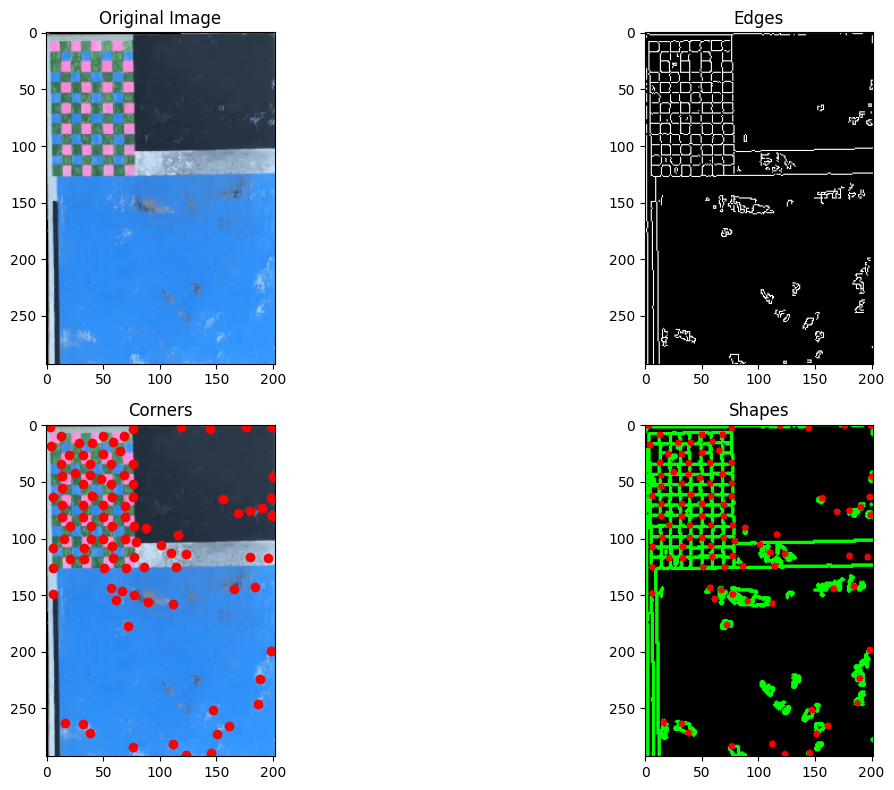

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2lab, deltaE_cie76

# Load the image using OpenCV
image_path = '/Users/eileenchang/Downloads/IMG_6811-removebg-preview.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Color Analysis


# Step 2: Edge Detection
edges = cv2.Canny(image, 100, 200)

# Step 3: Corner Detection
corners = cv2.goodFeaturesToTrack(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Step 4: Shape Detection (an example using contours)
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank canvas to draw detected shapes
shapes_image = np.zeros_like(image_rgb)

# Draw detected contours
for cnt in contours:
    cv2.drawContours(shapes_image, [cnt], 0, (0, 255, 0), 2)

# Draw corners
for i in corners:
    x, y = i.ravel()
    cv2.circle(shapes_image, (x, y), 3, (255, 0, 0), -1)

# Show the analysis results
plt.figure(figsize=(15, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

# Edges
plt.subplot(2, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges')

# Corners
plt.subplot(2, 2, 3)
plt.imshow(image_rgb)
plt.scatter(corners[:, 0, 0], corners[:, 0, 1], c='red')
plt.title('Corners')

# Shapes
plt.subplot(2, 2, 4)
plt.imshow(shapes_image)
plt.title('Shapes')

plt.tight_layout()
plt.show()
